In [ ]:
%pip install tiktoken
%pip install huggingface-hub
%pip install datasets
# login using hf auth login (in the terminal) and paste your token

In [1]:
from datasets import load_dataset

ds = load_dataset("abisee/cnn_dailymail", "3.0.0", split="test")

d:\coding\CS_6303\plot_data\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\coding\CS_6303\plot_data\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\GNG\.cache\huggingface\hub\datasets--abisee--cnn_dailymail. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer

In [3]:
# Display first few rows of the dataset
print(f"Dataset type: {type(ds)}")
print(f"Dataset size: {len(ds)} rows")
print(f"\nColumn names: {ds.column_names}")
print("\nFirst 3 rows:")
for i in range(3):
    print(f"\n--- Row {i} ---")
    print(ds[i])

Dataset type: <class 'datasets.arrow_dataset.Dataset'>
Dataset size: 11490 rows

Column names: ['article', 'highlights', 'id']

First 3 rows:

--- Row 0 ---
{'article': '(CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC\'s founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians may be subject to counter-charges as well. Israel and the United States, 

In [4]:
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [5]:
# Calculate average input and output tokens for the dataset
import pandas as pd
encoding_name = "o200k_base"  # GPT-4o, 4.1, 5 encoding

sample_size = len(ds)
print(f"Processing {sample_size} samples...\n")

# Determine column names (adapt based on dataset)
columns = ds.column_names
print(f"Available columns: {columns}")

# For CNN/DailyMail dataset, columns are: article and highlights
input_col = 'article'
output_col = 'highlights'

# Initialize counters
total_input_tokens = 0
total_output_tokens = 0
total_input_words = 0
total_output_words = 0

min_input_tokens = float('inf')
max_input_tokens = 0
min_output_tokens = float('inf')
max_output_tokens = 0

# Store all token counts for distribution analysis
all_input_token_counts = []
all_output_token_counts = []

for i in range(sample_size):
    input_text = ds[i][input_col]
    output_text = ds[i][output_col]
    
    input_tokens = num_tokens_from_string(input_text, encoding_name)
    output_tokens = num_tokens_from_string(output_text, encoding_name)
    
    total_input_tokens += input_tokens
    total_output_tokens += output_tokens
    total_input_words += len(input_text.split())
    total_output_words += len(output_text.split())
    
    # Track min/max
    min_input_tokens = min(min_input_tokens, input_tokens)
    max_input_tokens = max(max_input_tokens, input_tokens)
    min_output_tokens = min(min_output_tokens, output_tokens)
    max_output_tokens = max(max_output_tokens, output_tokens)
    
    # Store for distribution
    all_input_token_counts.append(input_tokens)
    all_output_token_counts.append(output_tokens)
    
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1}/{sample_size} samples...")

# Calculate averages
avg_input_tokens = total_input_tokens / sample_size if sample_size > 0 else 0
avg_output_tokens = total_output_tokens / sample_size if sample_size > 0 else 0
avg_input_words = total_input_words / sample_size if sample_size > 0 else 0
avg_output_words = total_output_words / sample_size if sample_size > 0 else 0

# Create distribution DataFrames
df_input_dist = pd.Series(all_input_token_counts, name=f'{input_col}_tokens')
df_output_dist = pd.Series(all_output_token_counts, name=f'{output_col}_tokens')

print("\n" + "=" * 70)
print("OVERALL RESULTS")
print("=" * 70)
print(f"Total samples processed: {sample_size}")
print(f"\n{input_col.capitalize()} Tokens:")
print(f"  Average: {avg_input_tokens:.2f}")
print(f"  Min: {min_input_tokens}")
print(f"  Max: {max_input_tokens}")
print(f"\n{output_col.capitalize()} Tokens:")
print(f"  Average: {avg_output_tokens:.2f}")
print(f"  Min: {min_output_tokens}")
print(f"  Max: {max_output_tokens}")
print(f"\nWords:")
print(f"  Avg {input_col} words: {avg_input_words:.2f}")
print(f"  Avg {output_col} words: {avg_output_words:.2f}")
print("=" * 70)

# Display token distribution statistics
print("\n" + "=" * 70)
print("TOKEN DISTRIBUTION STATISTICS")
print("=" * 70)
print(f"\n{input_col.capitalize()} Tokens Distribution:")
print(df_input_dist.describe().to_string())
print(f"\n{output_col.capitalize()} Tokens Distribution:")
print(df_output_dist.describe().to_string())
print("=" * 70)

Processing 11490 samples...

Available columns: ['article', 'highlights', 'id']
Processed 1000/11490 samples...
Processed 2000/11490 samples...
Processed 3000/11490 samples...
Processed 4000/11490 samples...
Processed 5000/11490 samples...
Processed 6000/11490 samples...
Processed 7000/11490 samples...
Processed 8000/11490 samples...
Processed 9000/11490 samples...
Processed 10000/11490 samples...
Processed 11000/11490 samples...

OVERALL RESULTS
Total samples processed: 11490

Article Tokens:
  Average: 845.41
  Min: 66
  Max: 3008

Highlights Tokens:
  Average: 66.89
  Min: 10
  Max: 847

Words:
  Avg article words: 683.51
  Avg highlights words: 55.01

TOKEN DISTRIBUTION STATISTICS

Article Tokens Distribution:
count    11490.000000
mean       845.410183
std        433.911617
min         66.000000
25%        516.000000
50%        759.000000
75%       1079.750000
max       3008.000000

Highlights Tokens Distribution:
count    11490.000000
mean        66.888686
std         28.074529
m

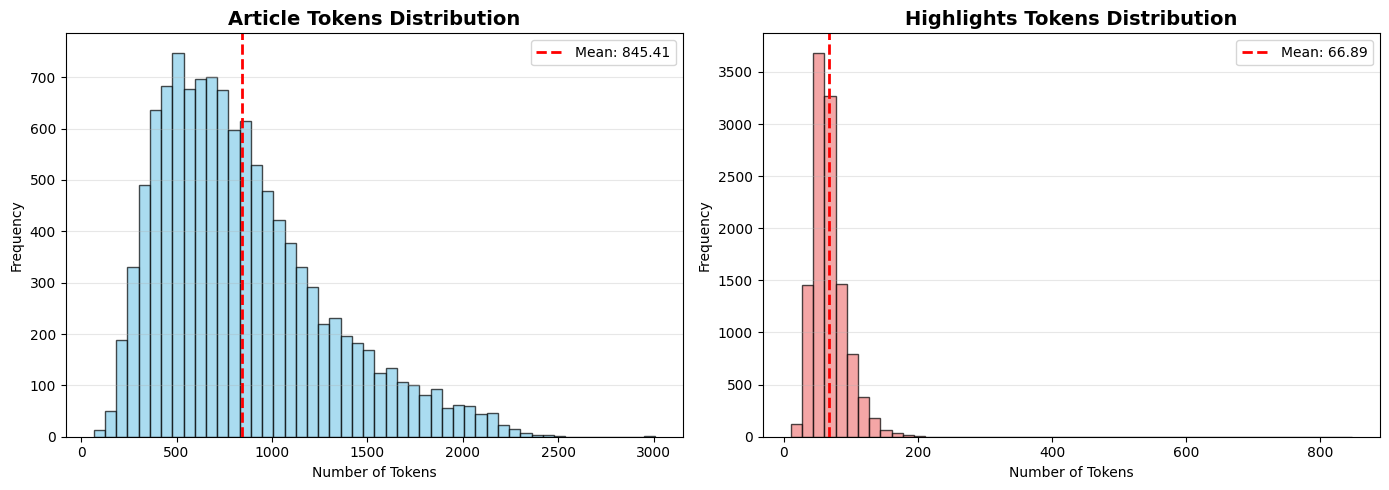


Distribution visualizations generated for article and highlights


In [8]:
# Visualize token distributions
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Input tokens histogram
axes[0].hist(all_input_token_counts, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title(f'{input_col.capitalize()} Tokens Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Tokens')
axes[0].set_ylabel('Frequency')
axes[0].axvline(avg_input_tokens, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_input_tokens:.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Output tokens histogram
axes[1].hist(all_output_token_counts, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title(f'{output_col.capitalize()} Tokens Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Tokens')
axes[1].set_ylabel('Frequency')
axes[1].axvline(avg_output_tokens, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_output_tokens:.2f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDistribution visualizations generated for {input_col} and {output_col}")